### Decision Tree - Heart Dataset

In [20]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('heart.csv')
df

In [9]:
x = df.drop('target', axis = 1)
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, stratify=y, random_state=25)
x_train.shape

(242, 13)

#### Model Training 

In [10]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier()

### Evaluation

In [11]:
# Training Data Evaluation
y_pred_train = dt_clf.predict(x_train)
cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n", cnf_matrix)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :", accuracy)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix:
 [[110   0]
 [  0 132]]
Accuracy : 1.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       132

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



In [12]:
# Testing Data Evaluation
y_pred_test = dt_clf.predict(x_test)
cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", cnf_matrix)

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy :", accuracy)

clf_report = classification_report(y_test, y_pred_test)
print("Classification Report :\n",clf_report)

Confusion Matrix:
 [[22  6]
 [ 8 25]]
Accuracy : 0.7704918032786885
Classification Report :
               precision    recall  f1-score   support

           0       0.73      0.79      0.76        28
           1       0.81      0.76      0.78        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



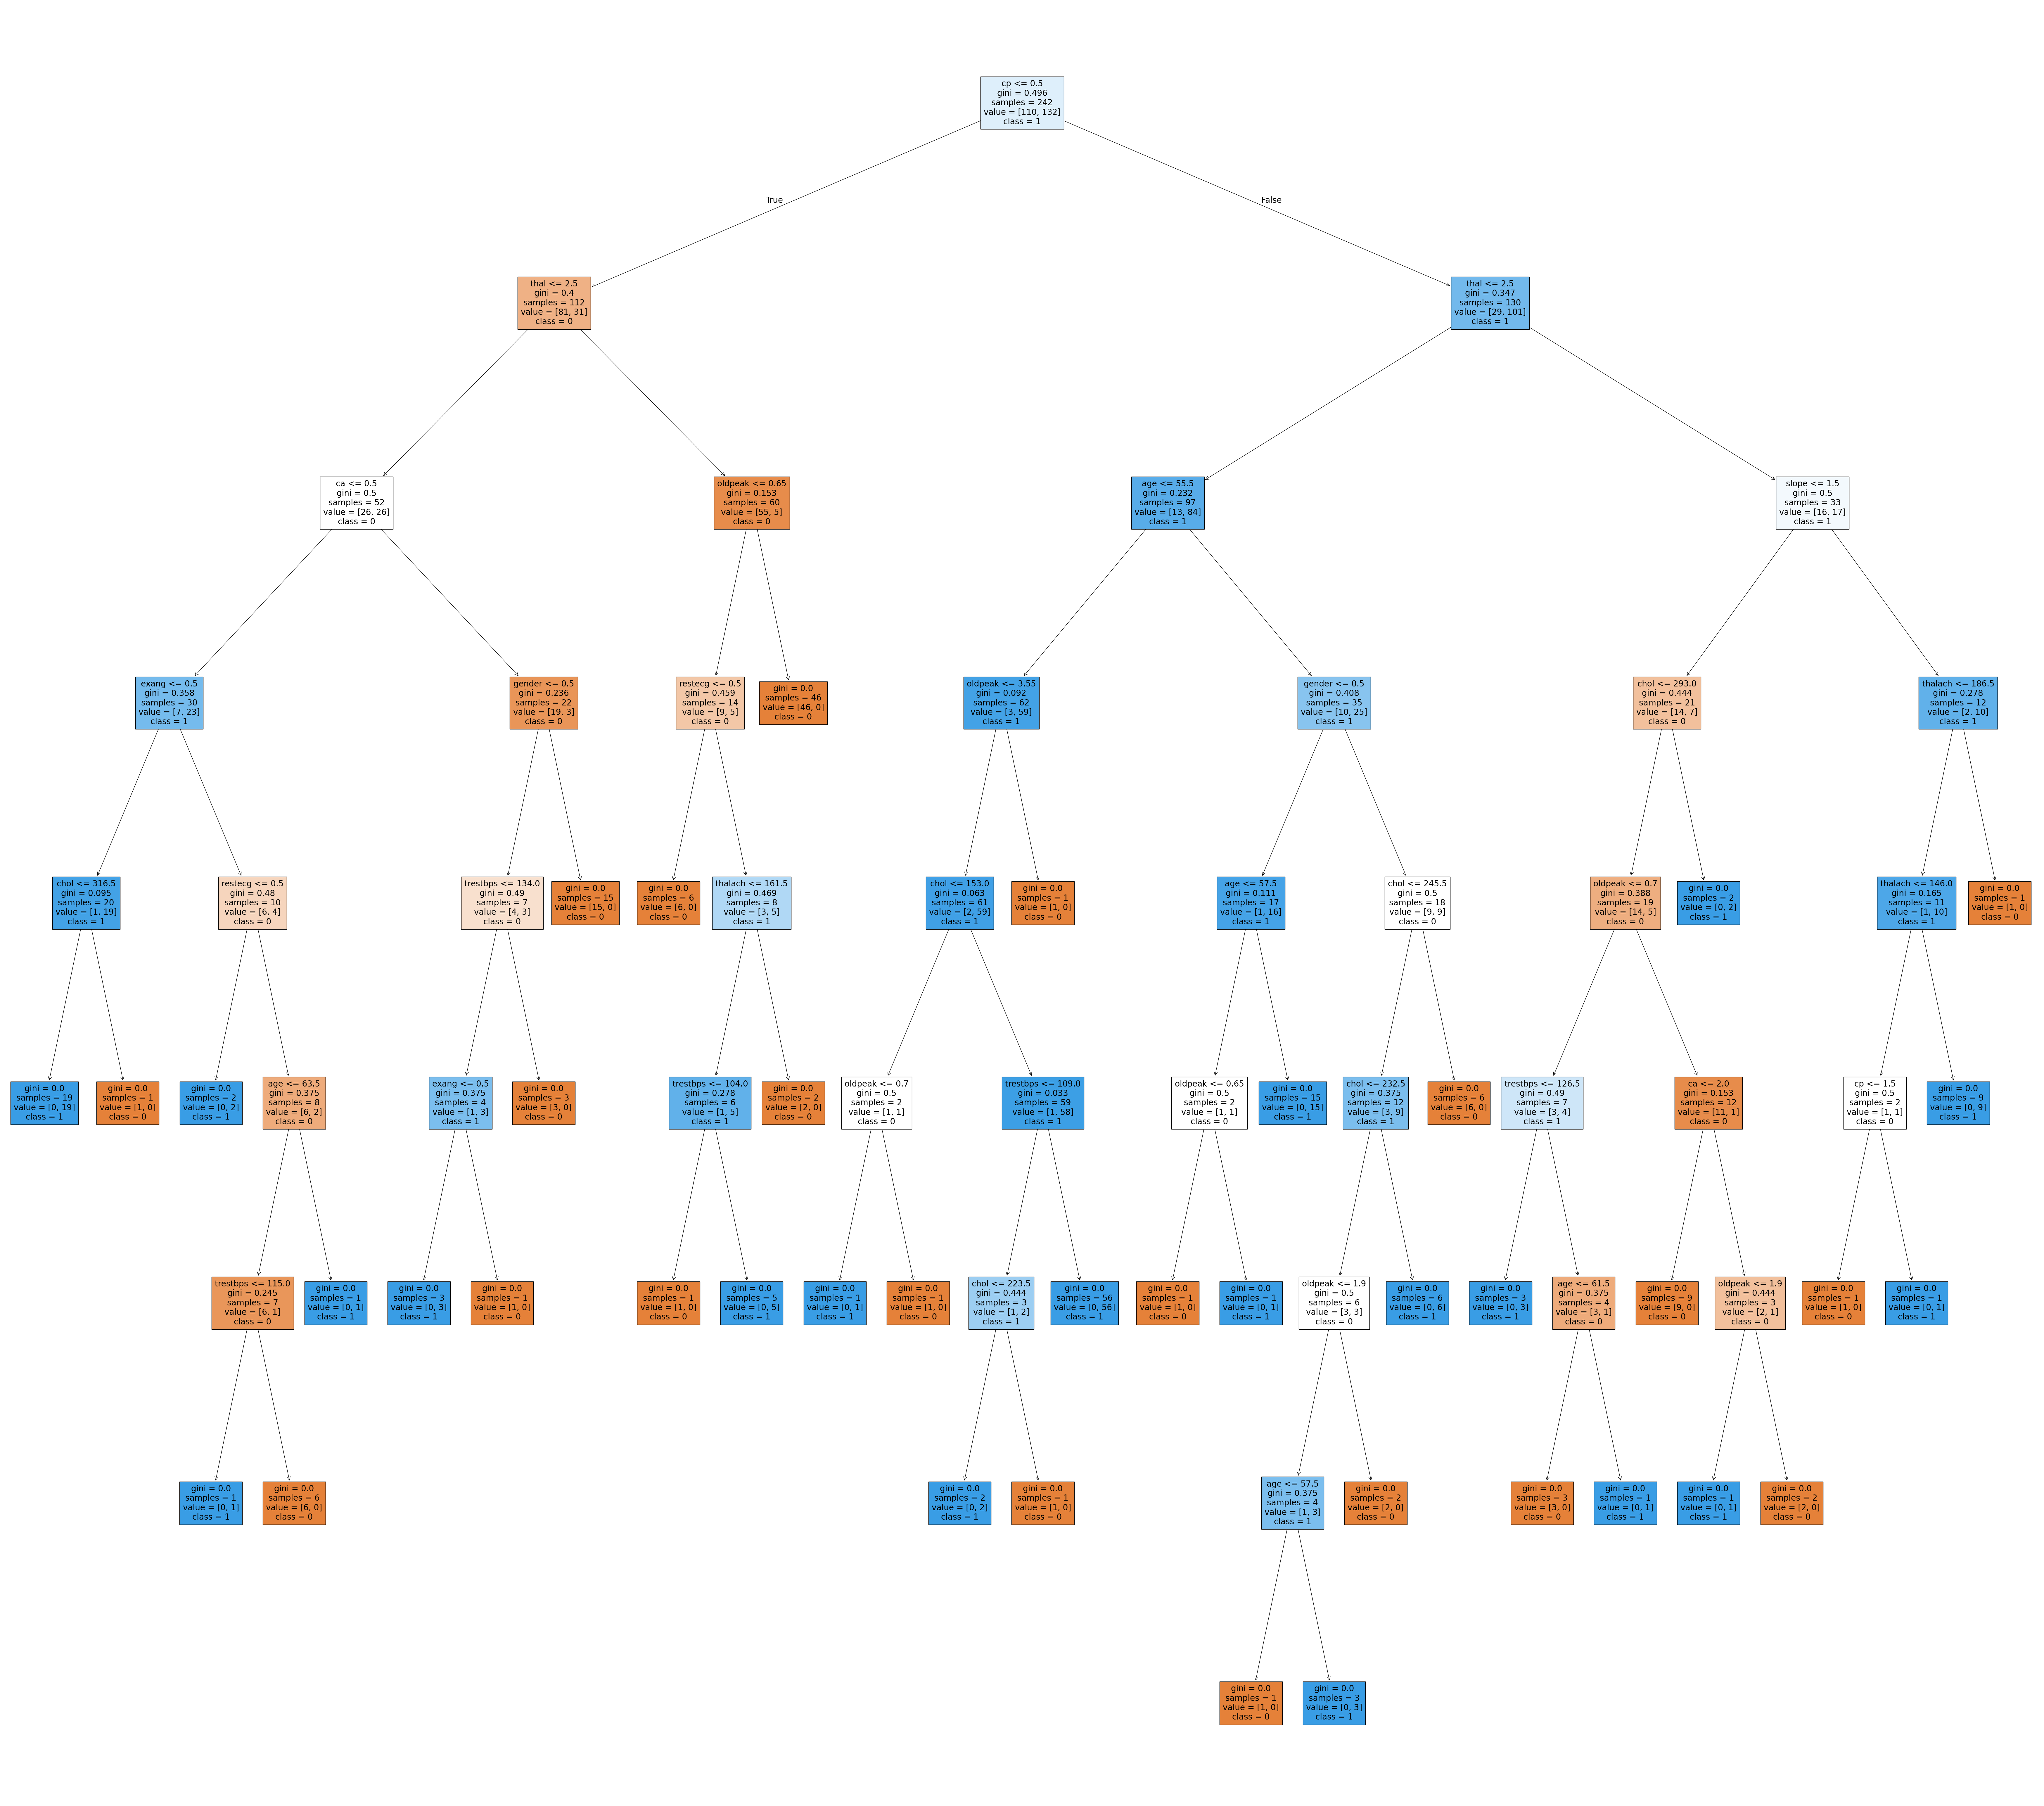

In [7]:
plt.figure(figsize = (90,80))
tree = plot_tree(dt_clf, feature_names=x.columns, class_names=['0','1'], filled=True)
plt.savefig('DT_clf_without_hyp.png')

In [7]:
dt_clf.feature_importances_

array([0.06406783, 0.04297173, 0.25082647, 0.06630482, 0.10917497,
       0.        , 0.03660714, 0.04513889, 0.04611111, 0.07932308,
       0.04015152, 0.08820707, 0.13111538])

<Axes: >

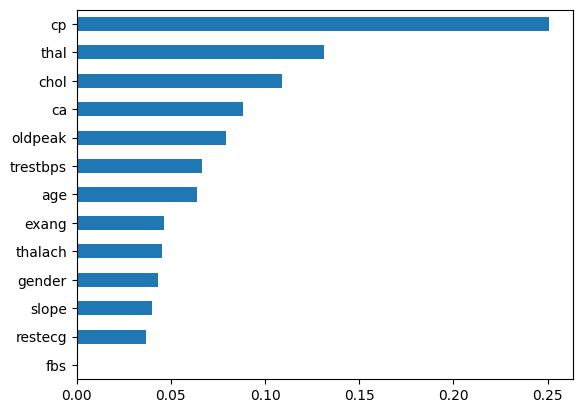

In [8]:
s1 = pd.Series(dt_clf.feature_importances_, index = x.columns)
s1.sort_values().plot(kind = 'barh')

### Hyperparameter Tuning

In [ ]:
# 2 * 12 * 15 * 5 * 8 


In [49]:
hyp_grid = {"criterion" : ['gini','entropy'],
            "max_depth" : range(3,8),
            "min_samples_split" : range(6,20),
            "min_samples_leaf" : range(3,15),
            }

dt_clf = DecisionTreeClassifier()

gscv_dt_clf = GridSearchCV(dt_clf, hyp_grid, verbose=1, cv = 5, n_jobs=-1)
gscv_dt_clf.fit(x_train, y_train)

Fitting 5 folds for each of 1680 candidates, totalling 8400 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 8),
                         'min_samples_leaf': range(3, 15),
                         'min_samples_split': range(6, 20)},
             verbose=1)

In [50]:
dt_clf = gscv_dt_clf.best_estimator_
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=11, min_samples_split=6)

In [51]:
# Training Data Evaluation
y_pred_train = dt_clf.predict(x_train)
cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n", cnf_matrix)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :", accuracy)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix:
 [[ 83  27]
 [ 12 120]]
Accuracy : 0.8388429752066116
Classification Report :
               precision    recall  f1-score   support

           0       0.87      0.75      0.81       110
           1       0.82      0.91      0.86       132

    accuracy                           0.84       242
   macro avg       0.85      0.83      0.83       242
weighted avg       0.84      0.84      0.84       242



In [52]:
# Testing Data Evaluation
y_pred_test = dt_clf.predict(x_test)
cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", cnf_matrix)

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy :", accuracy)

clf_report = classification_report(y_test, y_pred_test)
print("Classification Report :\n",clf_report)

Confusion Matrix:
 [[22  6]
 [ 4 29]]
Accuracy : 0.8360655737704918
Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.83      0.88      0.85        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



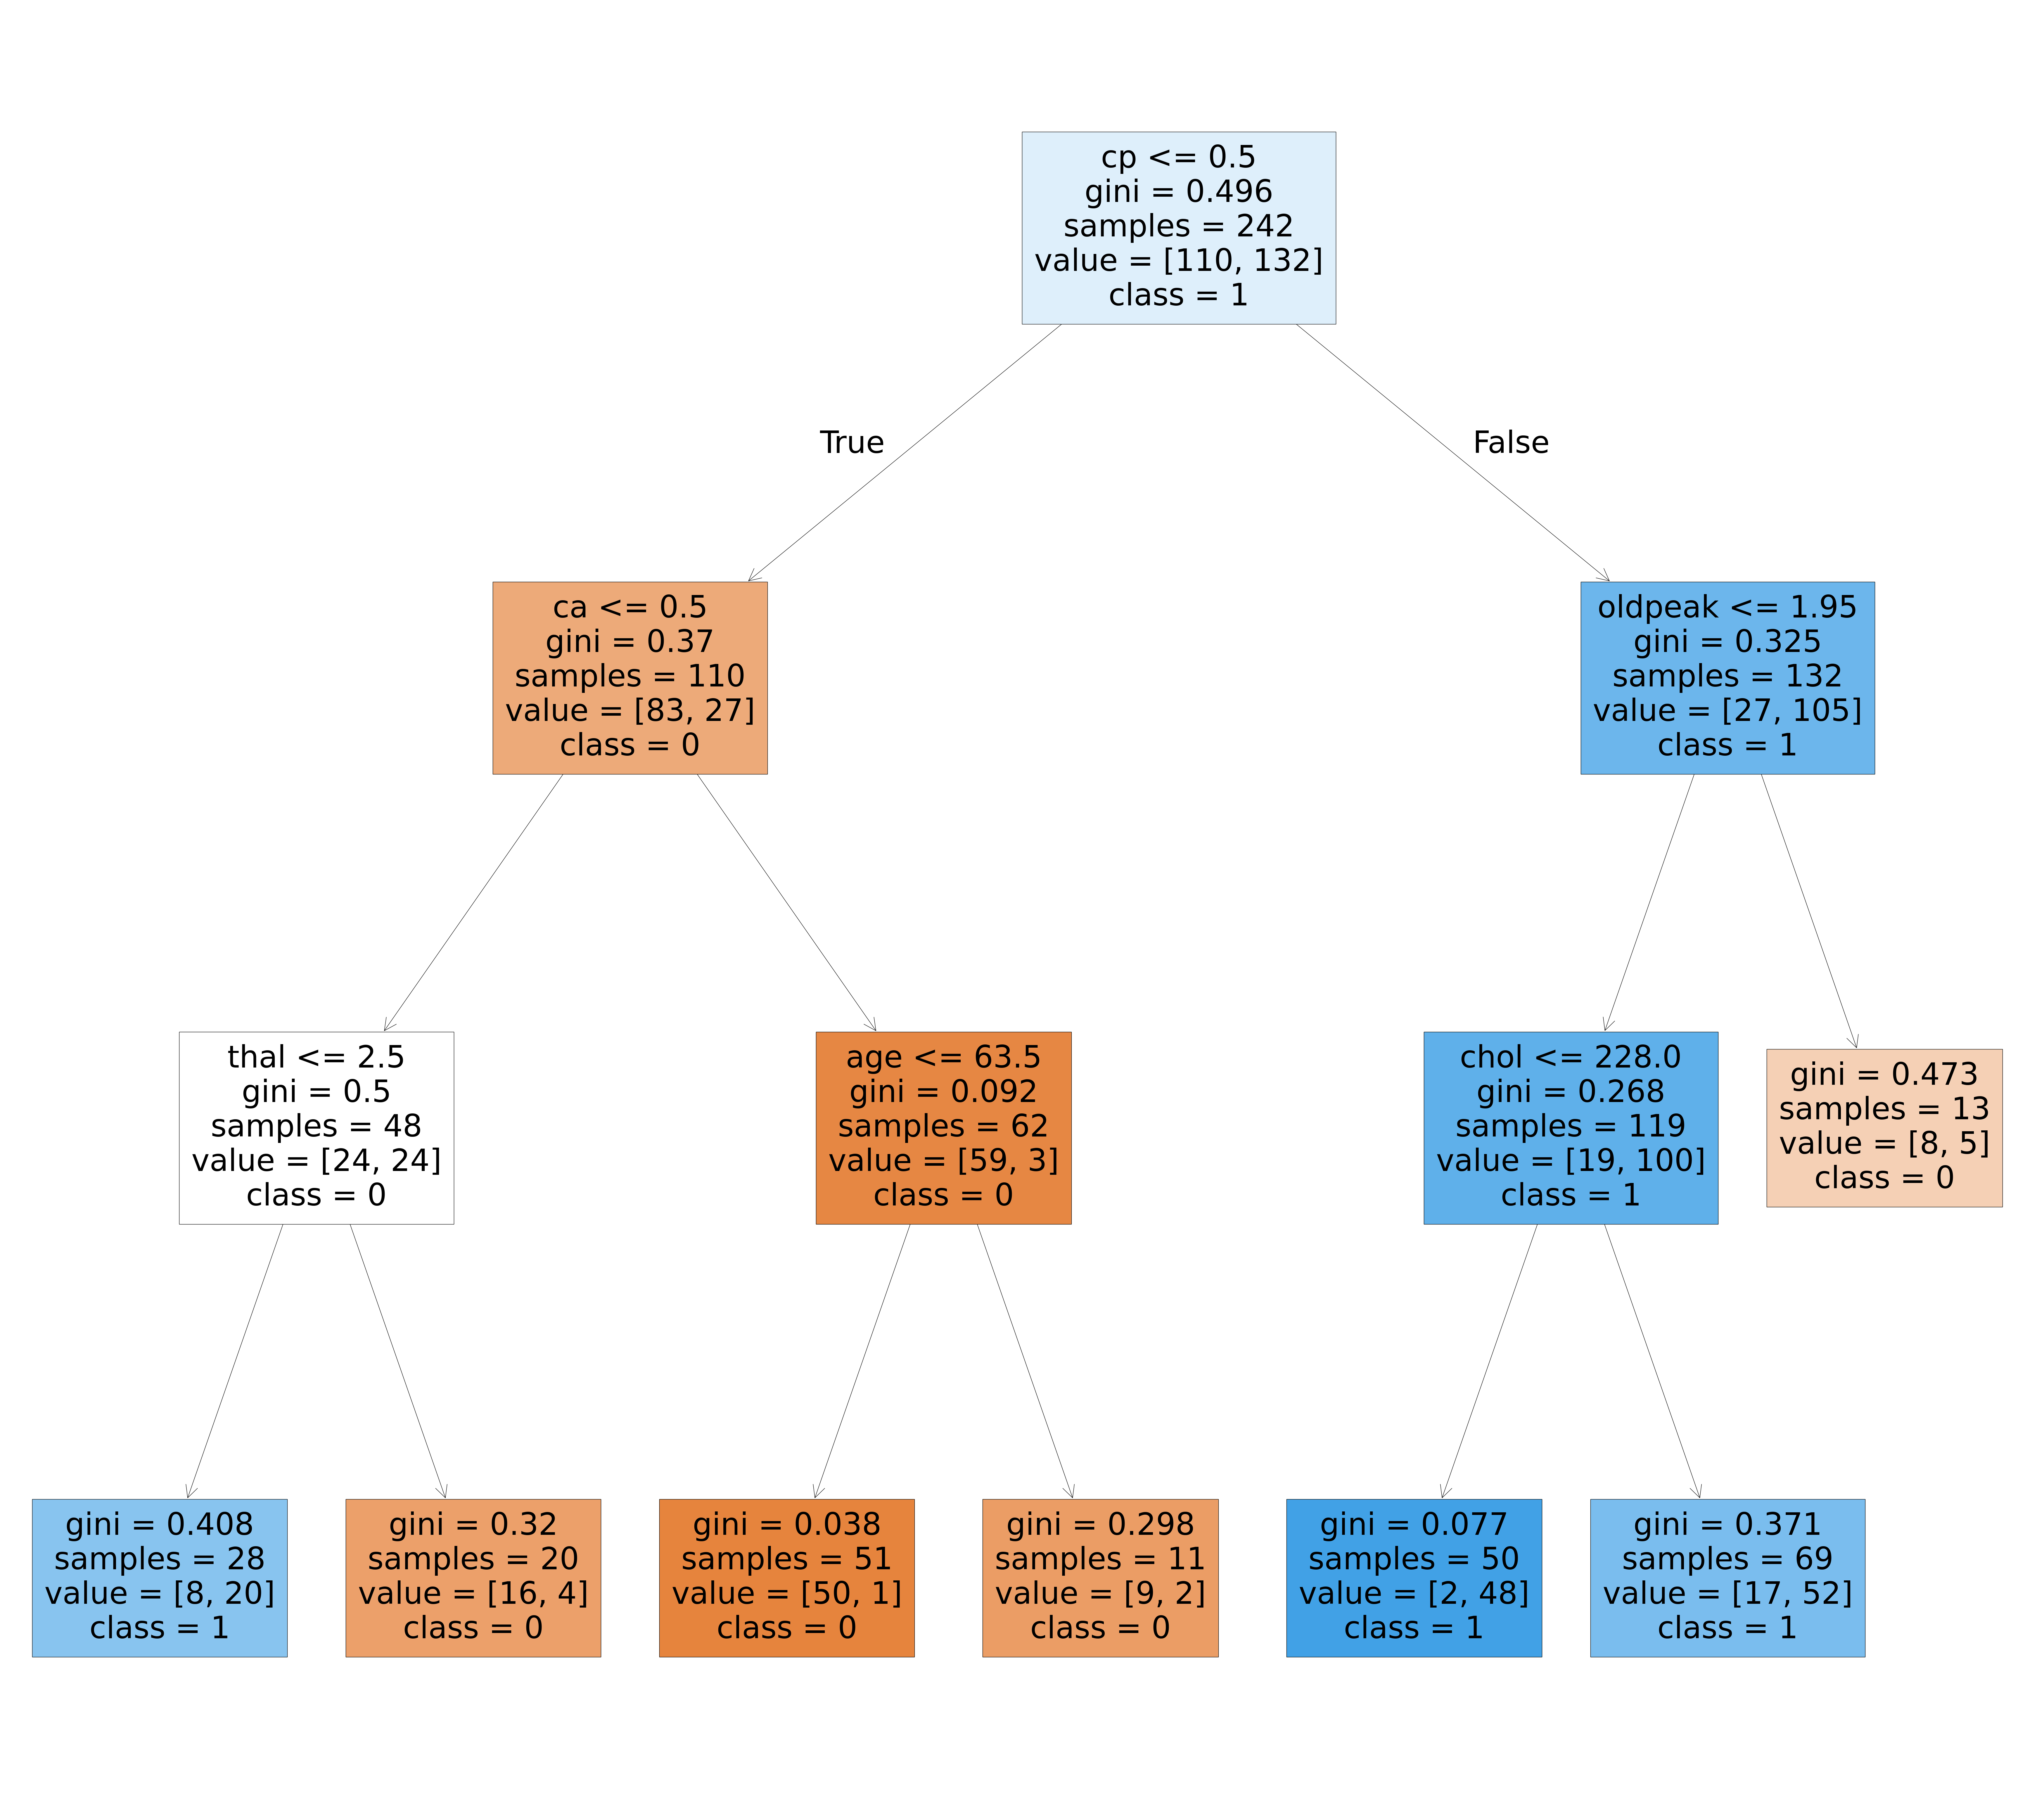

In [54]:
plt.figure(figsize = (90,80))
tree = plot_tree(dt_clf, feature_names=x.columns, class_names=['0','1'], filled=True)
plt.savefig('DT_clf_with_hyp.png')

<Axes: >

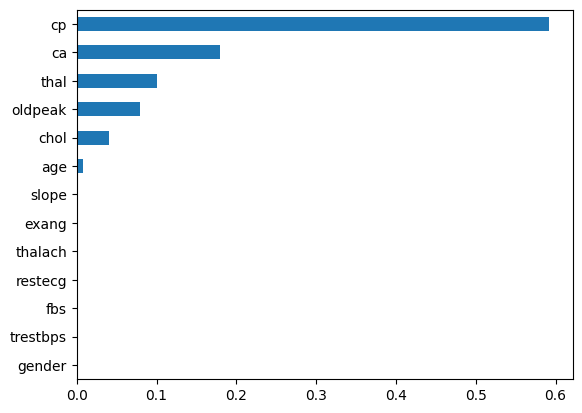

In [55]:
s1 = pd.Series(dt_clf.feature_importances_, index = x.columns)
s1.sort_values().plot(kind = 'barh')

#### Randmized Search CV

In [56]:
hyp_grid = {"criterion" : ['gini','entropy'],
            "max_depth" : range(3,8),
            "min_samples_split" : range(6,20),
            "min_samples_leaf" : range(3,15),
            }

dt_clf = DecisionTreeClassifier()

gscv_dt_clf = RandomizedSearchCV(dt_clf, hyp_grid, verbose=1, cv = 5, n_jobs=-1)
gscv_dt_clf.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(3, 8),
                                        'min_samples_leaf': range(3, 15),
                                        'min_samples_split': range(6, 20)},
                   verbose=1)

In [58]:
# Training Data Evaluation
dt_clf = gscv_dt_clf.best_estimator_
dt_clf.fit(x_train, y_train)

y_pred_train = dt_clf.predict(x_train)
cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n", cnf_matrix)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :", accuracy)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix:
 [[ 93  17]
 [ 17 115]]
Accuracy : 0.859504132231405
Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.87      0.87      0.87       132

    accuracy                           0.86       242
   macro avg       0.86      0.86      0.86       242
weighted avg       0.86      0.86      0.86       242



In [59]:
# Testing Data Evaluation
y_pred_test = dt_clf.predict(x_test)
cnf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", cnf_matrix)

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy :", accuracy)

clf_report = classification_report(y_test, y_pred_test)
print("Classification Report :\n",clf_report)

Confusion Matrix:
 [[24  4]
 [10 23]]
Accuracy : 0.7704918032786885
Classification Report :
               precision    recall  f1-score   support

           0       0.71      0.86      0.77        28
           1       0.85      0.70      0.77        33

    accuracy                           0.77        61
   macro avg       0.78      0.78      0.77        61
weighted avg       0.78      0.77      0.77        61



### Pruning

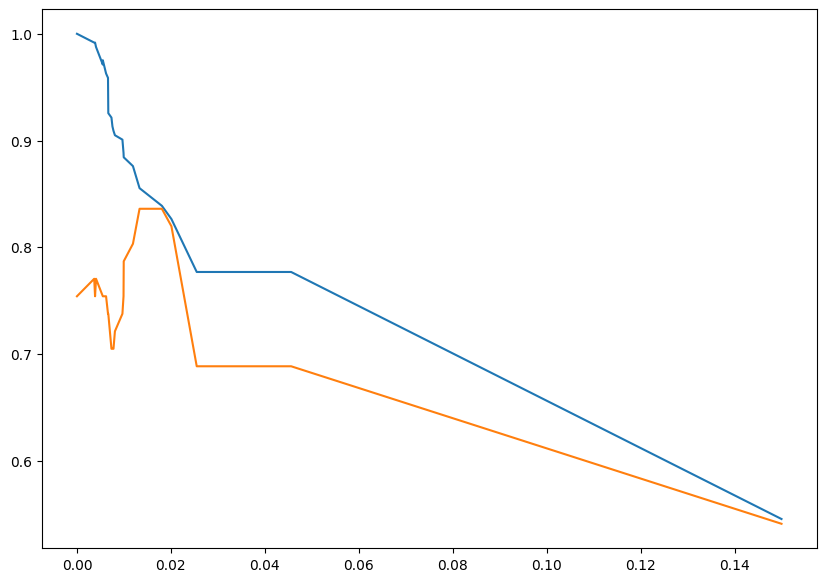

In [73]:
dt_clf = DecisionTreeClassifier()
# dt_clf.fit(x_train, y_train)
ccp_alpha_values = dt_clf.cost_complexity_pruning_path(x_train, y_train)['ccp_alphas']
# print(ccp_alpha_values)

train_data_accuracy = []
test_data_accuracy = []

for i in ccp_alpha_values:
    dt_clf = DecisionTreeClassifier(ccp_alpha=i)
    dt_clf.fit(x_train, y_train)
    train_data_accuracy.append(dt_clf.score(x_train, y_train))
    test_data_accuracy.append(dt_clf.score(x_test, y_test))

plt.figure(figsize=(10,7))
plt.plot(ccp_alpha_values, train_data_accuracy)
plt.plot(ccp_alpha_values, test_data_accuracy)

In [77]:
np.argmax(test_data_accuracy)

20

In [79]:
test_data_accuracy[20]

0.8360655737704918

In [81]:
train_data_accuracy[20]

0.8553719008264463

#### Conclusion

In [ ]:
1. Hyperparameter Tuning:
    Training : 83.88
    Testing : 83.60

2. Pruning:
    Training: 85.53
    Testing: 83.60